### Import Library

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
import fasttext

### Read the raw data

In [2]:
df = pd.read_csv("data.tsv", sep='\t')

In [3]:
df.isnull().sum()

id           0
sentiment    0
review       0
dtype: int64

In [4]:
df.shape

(25000, 3)

In [5]:
df.nunique()

id           25000
sentiment        2
review       24904
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


In [7]:
df

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...
...,...,...,...
24995,3453_3,0,It seems like more consideration has gone into...
24996,5064_1,0,I don't believe they made this film. Completel...
24997,10905_3,0,"Guy is a loser. Can't get girls, needs to buil..."
24998,10194_3,0,This 30 minute documentary Buñuel made in the ...


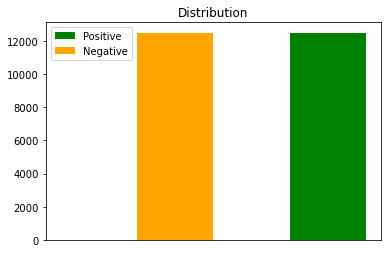

In [8]:
plt.hist(df[df.sentiment == 1].sentiment,
         bins=2, color='green', label='Positive')
plt.hist(df[df.sentiment == 0].sentiment,
         bins=2, color='orange', label='Negative')
plt.title('Distribution')
plt.xticks([])
plt.legend()
plt.show()

In [9]:
print(df["sentiment"][0])
df["review"][0]

1


"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

### Clean Review & Word Tokenzitaion: remove stopwords and non-alphabatical characters, and convert all words to lowercases

In [10]:
stop_words = stopwords.words("english")
def clean(review):
    clean_html = BeautifulSoup(review).get_text()
    clean_non_letters = re.sub("[^a-zA-Z]", " ", clean_html)
    cleaned_lowercase = clean_non_letters.lower()
    words = cleaned_lowercase.split()
    cleaned_words = [w for w in words if w not in stop_words]
    return " ".join(cleaned_words)

df["cleaned_review"] = df["review"].apply(clean)
df

,id,sentiment,review,cleaned_review
0,5814_8,1,With all this stuff going down at the moment w...,stuff going moment mj started listening music ...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",classic war worlds timothy hines entertaining ...
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,film starts manager nicholas bell giving welco...
3,3630_4,0,It must be assumed that those who praised this...,must assumed praised film greatest filmed oper...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,superbly trashy wondrously unpretentious explo...
...,...,...,...,...
24995,3453_3,0,It seems like more consideration has gone into...,seems like consideration gone imdb reviews fil...
24996,5064_1,0,I don't believe they made this film. Completel...,believe made film completely unnecessary first...
24997,10905_3,0,"Guy is a loser. Can't get girls, needs to buil...",guy loser get girls needs build picked stronge...
24998,10194_3,0,This 30 minute documentary Buñuel made in the ...,minute documentary bu uel made early one spain...


In [11]:
print(df["sentiment"][0])
df["cleaned_review"][0]

1


'stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate workin

### Train-Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_review'],df['sentiment'],test_size = 0.3, random_state = 10)
print("Traing size:", X_train.shape)
print("Test size:", X_test.shape)

Traing size: (17500,)
Test size: (7500,)


### Fit model - Logestic Regression Model

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_review'],df['sentiment'],test_size = 0.3, random_state = 10)
print("Traing size:", X_train.shape)
print("Test size:", X_test.shape)

Traing size: (17500,)
Test size: (7500,)


In [14]:
max_feature = [50,100,150,200,250]
penalty = ['l1', 'l2']
regularization = [0.5, 1, 5]
model_pars = []
scores = []
f1 = 0

In [15]:
for n in max_feature:
    vectorizer = TfidfVectorizer(max_features = n)
    vectorized_train = vectorizer.fit_transform(X_train)
    vectorized_test = vectorizer.fit_transform(X_test)
    for p in penalty:
        for c in regularization:
            model_pars.append(str(n) + ", penalty=" + str(p) + ", C=" + str(c))
            lr = LogisticRegression(penalty=p, C=c, random_state=0, max_iter=300, solver='saga')
            model_lr = lr.fit(vectorized_train,y_train)
            pred = model_lr.predict(vectorized_test)
            scores.append([precision_score(y_test, pred, average='macro'),
                            recall_score(y_test, pred, average='macro'),
                            f1_score(y_test, pred, average='macro'),
                            accuracy_score(y_test, pred)])
            cm = confusion_matrix(y_test, pred)
            
            if f1 < f1_score(y_test, pred, average='macro'):
                best_model = model_lr
                best_max_feature = n
                f1 = f1_score(y_test, pred, average='macro')
                best_cm = cm
results = pd.DataFrame.from_dict(dict(zip(model_pars, scores))).set_index(
    pd.Index(['Precision', 'Recall', 'F1-score', 'Accuracy'])).T.sort_values('F1-score', ascending=False).round(4)

best_f1_score = f1  
print('Parameters of the best logistice regression model: ', results.index[0])
print('F1-score of the best logistic regression model: ', best_f1_score)

Parameters of the best logistice regression model:  50, penalty=l1, C=0.5
F1-score of the best logistic regression model:  0.7041959050684197


In [18]:
results.to_csv('logistic regression.csv')

In [16]:
vectorizer = TfidfVectorizer(max_features = 50)
vectorized_train = vectorizer.fit_transform(X_train)
vectorized_test = vectorizer.fit_transform(X_test)
lr = LogisticRegression(penalty='l1', C=0.5, random_state=0, max_iter=300, solver='saga')
model_lr = lr.fit(vectorized_train,y_train)
pred = model_lr.predict(vectorized_test)
cm = confusion_matrix(y_test, pred)
print(cm)
print('precision',precision_score(y_test, pred, average='macro'))
print('recall',recall_score(y_test, pred, average='macro'))
print('f1-score', f1_score(y_test, pred, average='macro'))
print('accuracy', accuracy_score(y_test, pred) )

[[2583 1118]
 [1100 2699]]
precision 0.704215126876768
recall 0.7041847998367579
f1-score 0.7041959050684197
accuracy 0.7042666666666667


### Fit model - Support Vector Machine

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_review'],df['sentiment'],test_size = 0.3, random_state = 10)
print("Traing size:", X_train.shape)
print("Test size:", X_test.shape)

Traing size: (17500,)
Test size: (7500,)


In [20]:
max_feature = [50,100,150,200,250]
penalty = ['l1', 'l2']
regularization = [0.5, 1, 5]
model_pars = []
scores = []
f1 = 0

In [21]:
for n in max_feature:
    vectorizer = TfidfVectorizer(max_features = n)
    vectorized_train = vectorizer.fit_transform(X_train)
    vectorized_test = vectorizer.fit_transform(X_test)
    for p in penalty:
        for c in regularization:
            model_pars.append(str(n) + ", penalty=" + str(p) + ", C=" + str(c))
            svm = LinearSVC(penalty=p, C=c, dual=False, random_state=0, max_iter=100000)
            model_svm = svm.fit(vectorized_train,y_train)
            pred = model_svm.predict(vectorized_test)
            scores.append([precision_score(y_test, pred, average='macro'),
                            recall_score(y_test, pred, average='macro'),
                            f1_score(y_test, pred, average='macro'),
                            accuracy_score(y_test, pred)])
            cm = confusion_matrix(y_test, pred)
            
            if f1 < f1_score(y_test, pred, average='macro'):
                best_model = model_svm
                best_max_feature = n
                f1 = f1_score(y_test, pred, average='macro')
                best_cm = cm
results = pd.DataFrame.from_dict(dict(zip(model_pars, scores))).set_index(
    pd.Index(['Precision', 'Recall', 'F1-score', 'Accuracy'])).T.sort_values('F1-score', ascending=False).round(4)

best_f1_score = f1  
print('Parameters of the best support vetor machine model: ', results.index[0])
print('F1-score of the best support vetor machine model: ', best_f1_score)

Parameters of the best support vetor machine model:  50, penalty=l1, C=1
F1-score of the best support vetor machine model:  0.7058164384191037


In [22]:
results.to_csv('svm.csv')

In [20]:
print(results)

                        Precision  Recall  F1-score  Accuracy
50, penalty=l1, C=1        0.7058  0.7058    0.7058    0.7059
50, penalty=l1, C=5        0.7054  0.7054    0.7054    0.7055
50, penalty=l2, C=0.5      0.7054  0.7054    0.7054    0.7055
50, penalty=l2, C=1        0.7054  0.7054    0.7054    0.7055
50, penalty=l1, C=0.5      0.7054  0.7054    0.7054    0.7055
50, penalty=l2, C=5        0.7053  0.7053    0.7053    0.7053
150, penalty=l2, C=0.5     0.6900  0.6840    0.6806    0.6828
150, penalty=l2, C=1       0.6900  0.6839    0.6804    0.6827
150, penalty=l2, C=5       0.6896  0.6834    0.6799    0.6821
150, penalty=l1, C=5       0.6896  0.6834    0.6798    0.6821
150, penalty=l1, C=0.5     0.6894  0.6832    0.6797    0.6820
150, penalty=l1, C=1       0.6893  0.6831    0.6796    0.6819
100, penalty=l1, C=5       0.6445  0.6437    0.6434    0.6441
100, penalty=l2, C=1       0.6445  0.6437    0.6434    0.6441
100, penalty=l2, C=0.5     0.6445  0.6437    0.6434    0.6441
100, pen

In [21]:
vectorizer = TfidfVectorizer(max_features = 50)
vectorized_train = vectorizer.fit_transform(X_train)
vectorized_test = vectorizer.fit_transform(X_test)
svm = LinearSVC(penalty='l1', C=1, dual=False, random_state=0, max_iter=100000)
model_svm = svm.fit(vectorized_train,y_train)
pred = model_svm.predict(vectorized_test)
cm = confusion_matrix(y_test, pred)
print(cm)
print('precision',precision_score(y_test, pred, average='macro'))
print('recall',recall_score(y_test, pred, average='macro'))
print('f1-score', f1_score(y_test, pred, average='macro'))
print('accuracy', accuracy_score(y_test, pred) )

[[2598 1103]
 [1103 2696]]
precision 0.7058164384191037
recall 0.7058164384191037
f1-score 0.7058164384191037
accuracy 0.7058666666666666


### Fit model - Fasttext (Facebook)

In [23]:
# reformat data for fasttext
fasttext_df = df.copy()
fasttext_df['label'] = '__label__' + fasttext_df['sentiment'].astype(str)
fasttext_df['label'] = fasttext_df['label'].apply(lambda x: x.replace(' ', ''))
fasttext_df['new_label'] = fasttext_df.apply(lambda x: str(x['label']) + ' ' + str(x['cleaned_review']), axis=1)
fasttext_df

,id,sentiment,review,cleaned_review,label,new_label
0,5814_8,1,With all this stuff going down at the moment w...,stuff going moment mj started listening music ...,__label__1,__label__1 stuff going moment mj started liste...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",classic war worlds timothy hines entertaining ...,__label__1,__label__1 classic war worlds timothy hines en...
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,film starts manager nicholas bell giving welco...,__label__0,__label__0 film starts manager nicholas bell g...
3,3630_4,0,It must be assumed that those who praised this...,must assumed praised film greatest filmed oper...,__label__0,__label__0 must assumed praised film greatest ...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,superbly trashy wondrously unpretentious explo...,__label__1,__label__1 superbly trashy wondrously unpreten...
...,...,...,...,...,...,...
24995,3453_3,0,It seems like more consideration has gone into...,seems like consideration gone imdb reviews fil...,__label__0,__label__0 seems like consideration gone imdb ...
24996,5064_1,0,I don't believe they made this film. Completel...,believe made film completely unnecessary first...,__label__0,__label__0 believe made film completely unnece...
24997,10905_3,0,"Guy is a loser. Can't get girls, needs to buil...",guy loser get girls needs build picked stronge...,__label__0,__label__0 guy loser get girls needs build pic...
24998,10194_3,0,This 30 minute documentary Buñuel made in the ...,minute documentary bu uel made early one spain...,__label__0,__label__0 minute documentary bu uel made earl...


In [25]:
wordNgrams = [1, 2, 3]
learning_rate = [0.1, 0.5]
epoch = [5, 10]
model_pars = []
scores = []
f1 = 0

In [26]:
def fasttext_metrics(X_test, fasttext_model):
    actual = []
    predicted = []
    for sample in X_test:
        actual.append(str(sample).split(' ')[0])
        predicted.append(str(fasttext_model.predict(sample)[0][0]))

    cm = confusion_matrix(actual, predicted)
    recall = np.mean(np.diag(cm) / np.sum(cm, axis=1))
    precision = np.mean(np.diag(cm) / np.sum(cm, axis=0))
    f1 = 2 * precision * recall / (precision + recall)
    acc = np.sum(np.diag(cm)) / np.sum(cm)

    return [precision, recall, f1, acc], cm

In [28]:
X_train, X_test, y_train, y_test = train_test_split(fasttext_df['new_label'], fasttext_df['label'], 
                                                    test_size=0.3,random_state=10)
X_train.to_csv('fasttext_X_train.txt', index=False, header=False)
X_test.to_csv('fasttext_X_test.txt', index=False, header=False)
for n in wordNgrams:
    for lr in learning_rate:
        for e in epoch:
            model_pars.append('wordNgram = ' + str(n) + ", learning rate=" + str(lr) + ", epoch=" + str(e))
            fasttext_model = fasttext.train_supervised('fasttext_X_train.txt', lr=lr, wordNgrams=n, epoch=e, loss = 'ns')
            eval_scores, cm = fasttext_metrics(X_test, fasttext_model)
            scores.append(eval_scores)
            
            if f1 < eval_scores[2]:
                best_model = fasttext_model
                f1 = eval_scores[2]
                best_cm = cm
results = pd.DataFrame.from_dict(dict(zip(model_pars, scores))).set_index(
        pd.Index(['Precision', 'Recall', 'F1-score', 'Accuracy'])).T.sort_values('F1-score', ascending=False).round(4)
best_f1_score = f1
print('Parameters of the best fasttext model: ', results.index[0])
print('F1-score of the best fasttext model: ', best_f1_score)

Parameters of the best fasttext model:  wordNgram = 2, learning rate=0.5, epoch=10
F1-score of the best fasttext model:  0.8937628235245251


In [29]:
results.to_csv('fasttext.csv')